In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv('customer_shopping_data.csv')

In [4]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [5]:
df_kn=df.loc[(df['shopping_mall']=='Kanyon')]
df_kn.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
9,I326945,C283361,Female,60,Clothing,2,600.16,Credit Card,22/08/2021,Kanyon
14,I336189,C555402,Female,67,Clothing,2,600.16,Credit Card,3/6/2022,Kanyon
23,I252275,C313348,Male,44,Technology,5,5250.00,Cash,26/10/2021,Kanyon


кол-во уникальных покупателей магазина Kanyon:

In [6]:
len(df['customer_id'].unique())

99457

список категорий товаров в данном торговом центре

In [7]:
df['category'].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

Определим общий доход по всем покупкам для каждого из магазинов торгового центра

In [8]:
revenue_by_mall=df.groupby('shopping_mall')['price'].sum().sort_values(ascending=False)
revenue_by_mall

shopping_mall
Mall of Istanbul     13851737.62
Kanyon               13710755.24
Metrocity            10249980.07
Metropol AVM          6937992.99
Istinye Park          6717077.54
Zorlu Center          3509649.02
Cevahir AVM           3433671.84
Viaport Outlet        3414019.46
Emaar Square Mall     3390408.31
Forum Istanbul        3336073.82
Name: price, dtype: float64

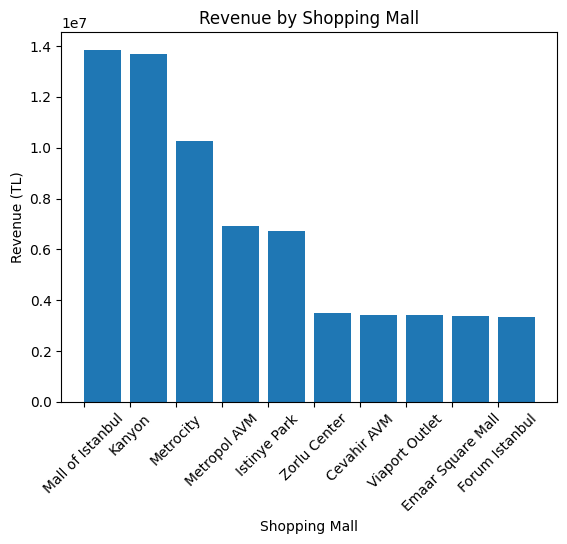

In [9]:
# создание столбчатой диаграммы для визуализации разницы в доходах между магазинами
plt.bar(revenue_by_mall.index, revenue_by_mall.values, align='edge')

plt.title("Revenue by Shopping Mall")
plt.xlabel("Shopping Mall")
plt.ylabel("Revenue (TL)")
plt.xticks(rotation=45)

plt.show()

Определим, какие категории продуктов пользуются наибольшим спросом среди женщин

In [24]:
df_female=df[df['gender']=='Female']
pplr_fml_ctg=df_female.groupby('category')['quantity'].sum().sort_values(ascending=False)
pplr_fml_ctg.head(20)

category
Clothing           62039
Cosmetics          27261
Food & Beverage    26362
Toys               18362
Shoes              17906
Technology          8977
Souvenir            8976
Books               8776
Name: quantity, dtype: int64

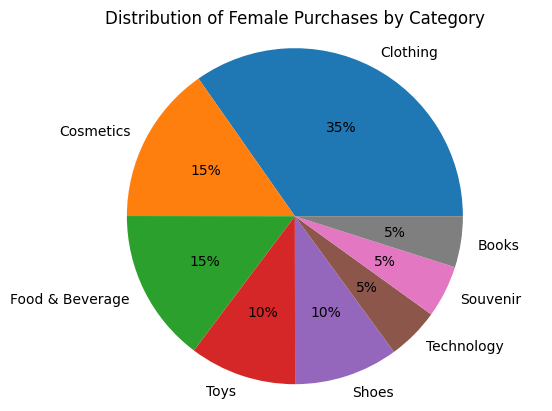

In [25]:
plt.pie(pplr_fml_ctg, labels=pplr_fml_ctg.index, autopct='%1.0f%%')
plt.axis('equal')
plt.title("Distribution of Female Purchases by Category")
plt.show()

Согласно диаграмме, в покупках женщин доминируют категории "одежда", "косметика" и "еда".

Проанализируем соотношение наиболее популярных способов оплаты в магазине Kanyon. Видим, что покупатели используют три способа оплаты - наличные,  кредитная и дебетовая карты ( примерно 45%, 35% и 20% соответвенно)

In [13]:
credit_card_df=df_kn[df_kn['payment_method']=='Credit Card']
debit_card_df=df_kn[df_kn['payment_method']=='Debit Card']
percent_credit_card=round((len(credit_card_df)/len(df_kn)*100),1)
percent_debit_card=round((len(debit_card_df)/len(df_kn)*100),1)
print(f'{percent_credit_card}%')
print(f'{percent_debit_card}%')

34.9%
20.5%


Посмотрим, есть ли в торговом центре магазины, принимающие только наличные

In [15]:
# Получаем список магазинов, которые принимают только наличные
cash_only_malls = df[df['payment_method'] == 'Cash']['shopping_mall'].unique()

# Создаем пустой список для магазинов, которые принимают только наличные
cash_only_no_cards_malls = []

# Проходим по каждому магазину, который принимает только наличные
for mall in cash_only_malls:
    # Получаем уникальные значения столбца "payment_method" для каждого магазина
    payment_methods = df[df['shopping_mall'] == mall]['payment_method'].unique()
    # Если уникальные значения содержат только "Cash", то добавляем магазин в список
    if len(payment_methods) == 1 and payment_methods[0] == 'Cash':
        cash_only_no_cards_malls.append(mall)

# Выводим список магазинов, которые принимают только наличные и не принимают дебетовые и кредитные карты
if len(cash_only_no_cards_malls)==0:
  print('Все магазины принимают и карты, и наличные')
else:
  print("Магазины, принимающие только наличные и не принимающие дебетовые и кредитные карты:")
  print(cash_only_no_cards_malls)

Все магазины принимают и карты, и наличные


Теперь проанализируем мужчин в возрасте от 30 до 40 лет: посмотрим на их самые популярные категории покупок.

In [20]:
df_male=df[(df['gender']=='Male') & (df['age']>=30) & (df['age']<=40)]
pplr_ml_ctg=df_male.groupby('category')['quantity'].sum()
pplr_ml_ctg.sort_values(ascending=False)

category
Clothing           8530
Cosmetics          4031
Food & Beverage    3926
Shoes              2605
Toys               2471
Technology         1323
Souvenir           1294
Books              1242
Name: quantity, dtype: int64

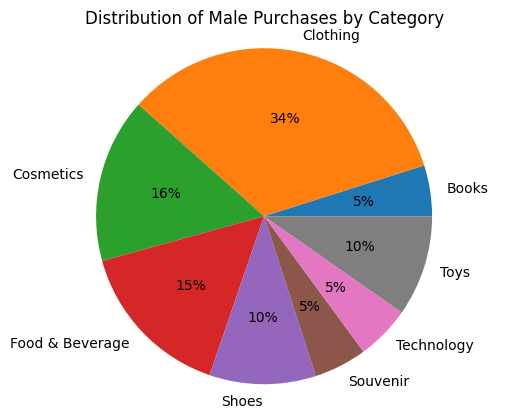

In [21]:
plt.pie(pplr_ml_ctg, labels=pplr_ml_ctg.index, autopct='%1.0f%%')
plt.axis('equal')
plt.title("Distribution of Male Purchases by Category")
plt.show()

В целом распределение по категориям не сильно отличается. 
Найдем соотношение всех покупателей в зависимости от их пола. 

In [26]:
gender_counts = df["gender"].value_counts()
total_purchases = len(df)

male_purchases_percent = gender_counts["Male"] / total_purchases * 100
female_purchases_percent = gender_counts["Female"] / total_purchases * 100

print("Доля мужчин: {:.2f}%".format(male_purchases_percent))
print("Доля женщин: {:.2f}%".format(female_purchases_percent))

Доля мужчин: 40.19%
Доля женщин: 59.81%
